In [7]:
import pandas as pd

df=pd.read_csv('ds_salaries.csv')

def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(" RESULT ".center(50, "-"))
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print("".center(50, "-"))
    
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

--------------------- RESULT ---------------------
Observations: 3755
Variables: 11
cat_cols: 6
num_cols: 2
cat_but_car: 3
num_but_cat: 2
--------------------------------------------------


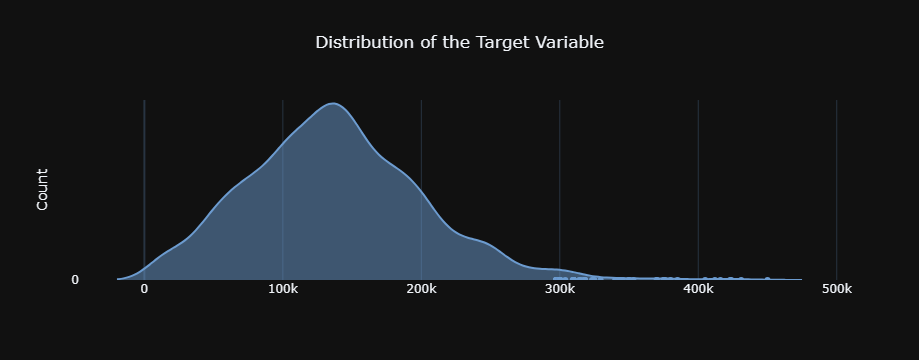

In [8]:
import pandas as pd
from plotly import graph_objects as go 

df=pd.read_csv('ds_salaries.csv')

def tar_var_summary(df, target):
    fig = go.Figure()
    fig.add_trace(go.Violin(x=df[target], line_color='#6C9BCF', name='Happy', y0=0))
    fig.update_traces(orientation='h', side='positive', meanline_visible=False)
    fig.update_layout(title={'text': "Distribution of the Target Variable",
                             'y':0.9,
                             'x':0.5,
                             'xanchor':'center',
                             'yanchor':'top'},
                             barmode='overlay',
                             yaxis=dict(title='Count'),
                             template = 'plotly_dark')
    fig.show()
    
tar_var_summary(df, "salary_in_usd")

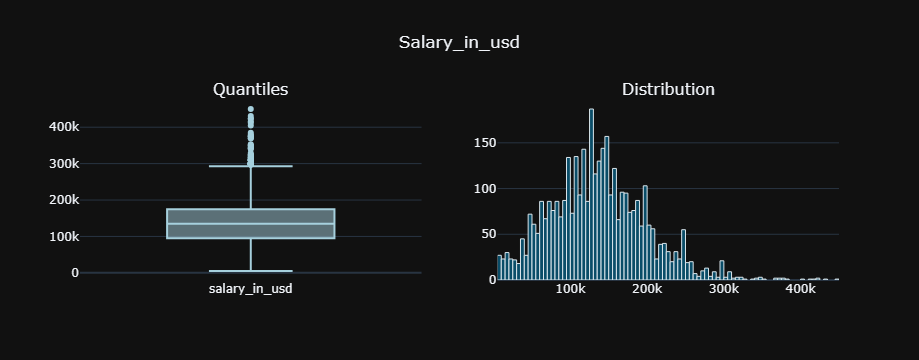

In [9]:
import pandas as pd
from plotly import graph_objects as go 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

df=pd.read_csv('ds_salaries.csv')

def num_var_summary(df, num_var):
    fig = make_subplots(rows = 1, cols = 2,
                       subplot_titles = ("Quantiles", "Distribution"))
    
    fig.add_trace(go.Box(y = df[num_var],
                         name = str(num_var),
                         showlegend = False,
                         marker_color = "#A6D0DD"), 
                         row = 1, col = 1)
    
    fig.add_trace(go.Histogram(x = df[num_var],
                               xbins = dict(start = df[num_var].min(),
                                            end = df[num_var].max()),
                               showlegend = False,
                               name = str(num_var),
                               marker=dict(color="#0A4D68",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1))
                              ),
                  row = 1, col = 2)
    
    fig.update_layout(title={'text': num_var.capitalize(),
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')
    
    iplot(fig)
    
num_var_summary(df, "salary_in_usd")

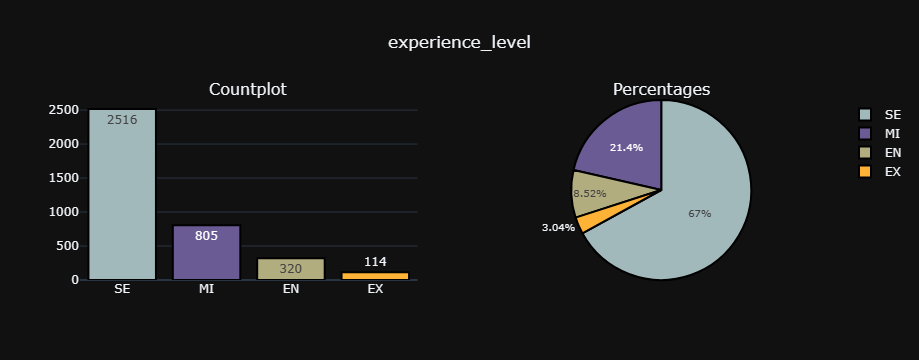

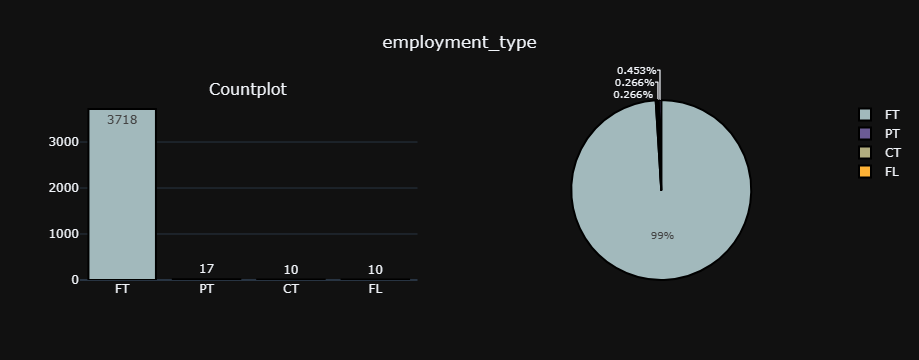

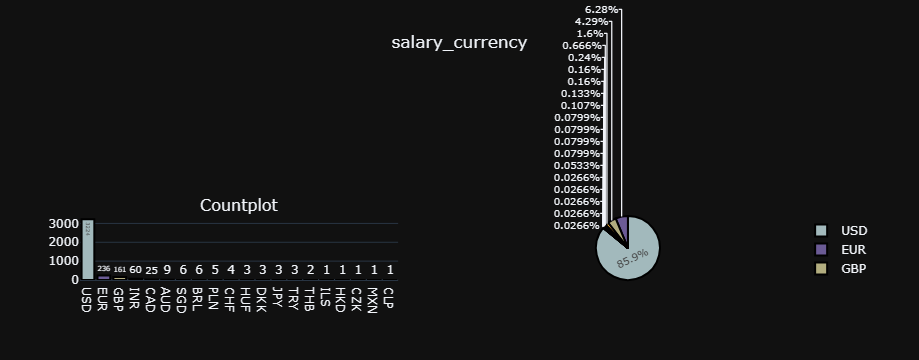

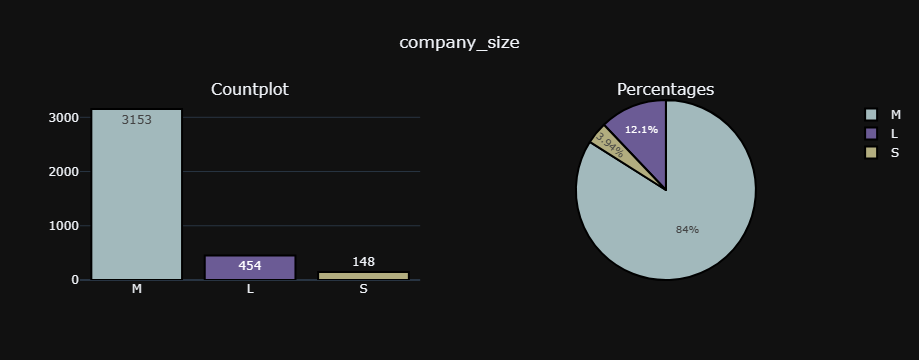

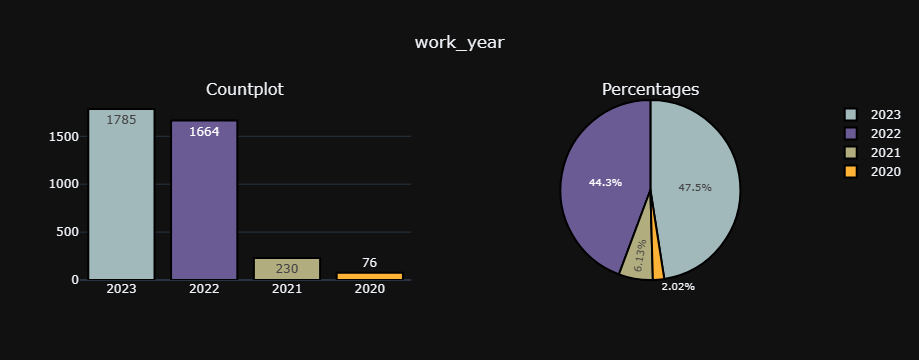

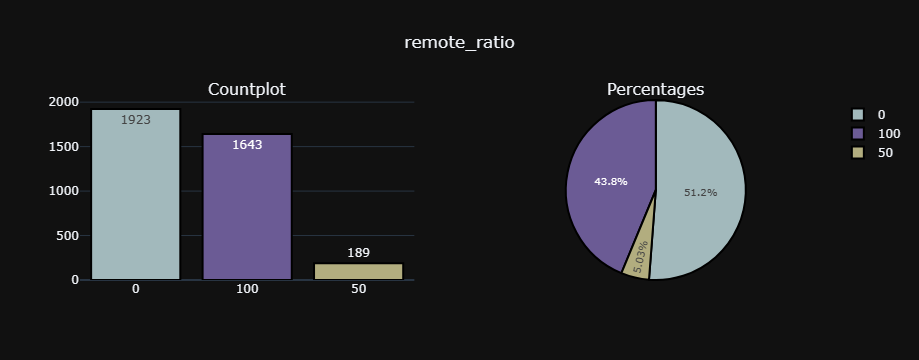

--------------------- RESULT ---------------------
Observations: 3755
Variables: 11
cat_cols: 6
num_cols: 2
cat_but_car: 3
num_but_cat: 2
--------------------------------------------------


In [10]:
import pandas as pd
from plotly import graph_objects as go 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

df=pd.read_csv('ds_salaries.csv')

def cat_var_summary(df, cat_var, show_title=True ):
    colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
              '#d64161', '#86af49', '#ff7b25']
    
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])
    
    x = [str(i) for i in df[cat_var].value_counts().index]
    y = df[cat_var].value_counts().values.tolist()
    
    fig.add_trace(go.Bar(x = x, y = y, text = y, 
                         textposition = "auto",
                       showlegend = False,
                        marker=dict(color=colors,
                              line = dict(color = 'black',
                                          width = 2))), row=1, col=1)
    
    fig.add_trace(go.Pie(labels = df[cat_var].value_counts().keys(),
                         values = df[cat_var].value_counts().values, 
                         hoverinfo ='label',
                  textinfo ='percent',
                  textfont_size = 10,
                  textposition ='auto',
                  marker=dict(colors=colors,
                              line = dict(color = 'black',
                                          width = 2))), 
                  row=1, col=2) 
    if not show_title:
        fig.update_annotations({'text': '', 'showarrow': False}, selector=dict(text='Percentages'))

    fig.update_layout(title={'text': cat_var,
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')
    
    iplot(fig)
    
for cat_var in cat_cols:
    if cat_var in ['employment_type', 'salary_currency']: 
        cat_var_summary(df, cat_var, show_title=False)
    else:
        cat_var_summary(df, cat_var)
                   
cat_cols, num_cols, cat_but_car = grab_col_names(df)

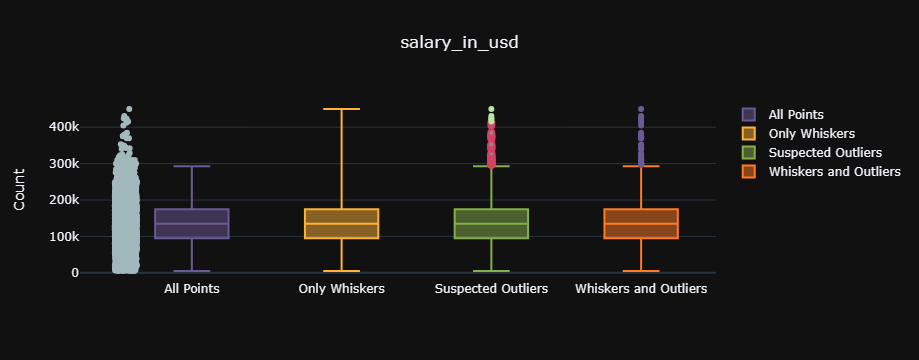

In [11]:
import pandas as pd
from plotly import graph_objects as go 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

df=pd.read_csv('ds_salaries.csv')

def detect_outliers(df, num_var): 
    trace0 = go.Box(
        y = df[num_var],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = '#a2b9bc'),
        line = dict(
            color = '#6b5b95')
    )

    trace1 = go.Box(
        y = df[num_var],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = '#b2ad7f'),
        line = dict(
            color = '#feb236')
    )

    trace2 = go.Box(
        y = df[num_var],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = '#b5e7a0',
            outliercolor = '#878f99',
            line = dict(
                outliercolor = '#d64161',
                outlierwidth = 2)),
        line = dict(
            color = '#86af49')
    )

    trace3 = go.Box(
        y = df[num_var],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = '#6b5b95'),
        line = dict(
            color = '#ff7b25')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(num_var)
    )
    
    layout = go.Layout(title={'text': num_var,
                         'y':0.9,
                         'x':0.5,
                         'xanchor':'center',
                         'yanchor':'top'},
                         barmode='overlay',
                         yaxis=dict(title='Count'),
                         template = 'plotly_dark')

    fig = go.Figure(data=data,layout=layout)
    
    iplot(fig)
    
detect_outliers(df, "salary_in_usd")